# COGS 108 - Suicide Rate in U.S. States and Possible Factors 

Google Drive Link: 
https://drive.google.com/file/d/1Ya5lQ6aNUyxStXg6YM7YCsg2AEJa8i9s/view

Youtube Video Link: 
https://youtu.be/X5kDcfqIWKQ 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Suicide has been one of the leading causes for the death of many Americans in the past. We are interested in finding out what are some factors that lead to the high suicide rates in major states in the U.S.. Out of many factors, for our project we decided to focus on a few which are unemployment rate, crime rate, and educational expenditure. Overall, we will determine which factor(s) play a significant effect to the rise of suicide rates.

# Names
- Sarai Mendoza
- Aretha Li
- Scott Shyu
- Jing Yuan
- Ramtin Kazemi

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between suicide rates in major U.S. states and the welfare variable of the states such as unemployment rate, crime rate, and educational expenditure?

<a id='background'></a>

## Background & Prior Work

Suicide has been statistically proven as the leading cause of death in the United States by the Centers for Disease Control and Prevention(CDC), with 45,979 deaths in 2020 alone. It is about one death every 11 minutes (“CDC”, 2022). This data is significant and should alert every resident in the U.S because the high suicide rates could imply potential underlying issues that may affect all of us. Being aware of the statistical knowledge about suicide rates would not only help future research to understand the effect and causes of suicide in the U.S., it could also lead to preventional measures such as implementing federal and state law policies and bills to help reduce suicide cases among K7-12 students (Walker, 2018). In our project we want to research several factors that influence the suicide rates of major U.S. states. These factors include unemployment rate, crime rate, and educational expenditure. We can determine which factors play a major effect to the rise of suicide rates and aim to take actions for change.  


References:
- https://www.cdc.gov/suicide/facts/index.html
- https://www.nea.org/advocating-for-change/new-from-nea/teen-suicide-rate-increases-states-look-schools-address-crisis

# Hypothesis


We hypothesize that states with higher crime and unemployment rates are correlated with higher suicide rates in those states and vice versa, because crime and unemployment are often associated with societal unstability and environmental pressure which could lead to people taking on self-harm behaviors. We also hypothesize that states with a higher spending on education are correlated with lower suicide rates and vice versa, because we believe that people and society with higher education would be more likely to make rationalized decisions and to have stablized jobs and personal lives.  

# Dataset(s)

Dataset #1: 

- Dataset Name: State Health Compare (Suicide per 100,000 from 1999-2020 by state) 
    - Link to the dataset: http://statehealthcompare.shadac.org/table/211/suicide-deaths-per-100000-people-by-total#1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52/a/32/243 
    - Number of observations: 1,122
    - This dataset shows the suicide rate for all 50 states plus the District of Columbia and spans from 1999-2020. They express the suicide rate by suicide per 100,000 and is calculated using data from the CDC. 

Dataset #2: 
- Dataset Name: Crime Rate and Unemployment Rate by state (1976-2014)
    - Link to the dataset: https://www.kaggle.com/lydiavasil/crime-rate-and-unemployment-rate-by-state 
    - Number of observations: 1989
    - This dataset shows the crime rate and unemployment rate by state including the District of Columbia, starting from 1976 to 2014. The crimes in the dataset are murder, rape, robbery, and aggravated assault. 
    
Dataset #3: 
- Dataset Name: U.S. Education Dataset: Unionification Process (1986-2019) 
    - Link to the dataset: https://www.kaggle.com/noriuk/us-education-datasets-unification-project  
    - Number of observations: 1,715 
    - This dataset shows multiple facets of U.S. education data such as the amount of students enrolled each year, school’s federal, state, and local revenue, as well as instruction expenditures, student scores, etc. These data will be used to support if there is a relationship between the enrollment of students and school revenue in K-12 education to the crime and unemployment rate across different states.
  
  
Combining Datasets: The datasets about crime rates, unemployment rates, and educational funding in U.S. states will be combined and analyzed in order to figure out which of these variables would have the strongest relationship with suicide rates in U.S. states.


# Setup

In [1]:
import statistics
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from collections import defaultdict

plt.rcParams['figure.figsize'] = (12, 6)
sns.set(font_scale=1.5, style="white")

In [2]:
# loading in data sets
suicide_rate = pd.read_csv('suicide_rate.csv') #suicide rate
crime_unemployment_rate = pd.read_csv('crimebystatecombinedwithunemployment.csv') #crime and unemployment
education = pd.read_csv('states_all.csv') #education funding

In [3]:
suicide_rate.head()

,Fips,Location,TimeFrame,Data Type,Data,MOE
0,1,Alabama,1999,"Rate per 100,000",12.46094,1.037785
1,1,Alabama,2000,"Rate per 100,000",13.10666,1.064901
2,1,Alabama,2001,"Rate per 100,000",11.37451,0.986649
3,1,Alabama,2002,"Rate per 100,000",11.44968,0.992287
4,1,Alabama,2003,"Rate per 100,000",11.43737,0.985613


In [4]:
crime_unemployment_rate.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2


In [5]:
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


# Data Cleaning

## Suicide Rate Cleaning

In [6]:
#drop the rows with Nan
#clean and years are ok
suicide_rate= suicide_rate.dropna()
#dropping the years that are out of our range
suicide_rate=suicide_rate.rename(columns={'TimeFrame': 'year','Data': 'rate'})
suicide_rate=suicide_rate.loc[suicide_rate['year'] < 2015]
suicide_rate=suicide_rate.loc[suicide_rate['year'] > 1998]
suicide_rate=suicide_rate.reset_index()
#simplifing the dataframe so it only shows state, year, and suicide rate
suicide_rate=suicide_rate[['Location','year','rate']]
#renaming column title for easy reading
suicide_rate = suicide_rate.rename(columns={"Location": "State", "year": "Year", "rate":"Suicide Rate"})

In [7]:
suicide_rate.head()

,State,Year,Suicide Rate
0,Alabama,1999,12.46094
1,Alabama,2000,13.10666
2,Alabama,2001,11.37451
3,Alabama,2002,11.44968
4,Alabama,2003,11.43737


## Education Expenditure Cleaning

Had to change the order from descending by year to descending year grouped by state which descends alphabetically.

In [8]:
#simplifying education to only education funding
educationExp = education[['STATE','YEAR','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE']]

In [9]:
#educationExp=educationExp.dropna(axis=0,how='all')
#educationExp.isna().value_counts()
#1999-2014
#nans = educationExp[educationExp.isna().any(axis=1)]

#dropping the years that are out of our range
educationExp=educationExp.loc[educationExp['YEAR'] < 2015]
educationExp=educationExp.loc[educationExp['YEAR'] > 1998]
#count and drop the rows with Nan
#clean and years are ok
educationExp.isna().value_counts()
educationExp=educationExp.dropna()
#Sorting by state and year descending
educationExp = educationExp.sort_values(["STATE", "YEAR"], ascending = (True, True))
educationExp=educationExp.reset_index()
#dropping extra index column
educationExp=educationExp.drop(['index'], axis = 1)
#renaming column title for *aesthetic*
educationExp = educationExp.rename(columns={"STATE": "State", "YEAR": "Year", 
                                            "TOTAL_EXPENDITURE":"Total Expenditure by State", "INSTRUCTION_EXPENDITURE":"Total Education Expenditure by State"})

In [10]:
educationExp.head()

,State,Year,Total Expenditure by State,Total Education Expenditure by State
0,ALABAMA,1999,4622810.0,2399626.0
1,ALABAMA,2000,5003267.0,2551713.0
2,ALABAMA,2001,5086045.0,2656393.0
3,ALABAMA,2002,5147821.0,2720735.0
4,ALABAMA,2003,5298932.0,2817111.0


## Joint Crime Rate and Unemployment Dataset Cleaning

In [11]:
#drop the rows with Nan
#clean and years are ok
crime_unemployment_rate=crime_unemployment_rate.dropna()
#dropping the years that are out of our range
crime_unemployment_rate=crime_unemployment_rate.loc[crime_unemployment_rate['year'] < 2015]
crime_unemployment_rate=crime_unemployment_rate.loc[crime_unemployment_rate['year'] > 1998]
crime_unemployment_rate=crime_unemployment_rate.reset_index()
#dropping extra index column
crime_unemployment_rate=crime_unemployment_rate.drop(['index'], axis = 1)

In [12]:
crime_unemployment_rate.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,4.733,1999,4369862,490.2,7.9,34.6,121.2,326.5,3922.3,884.4,2737.3,300.6
1,AL,4.583,2000,4447100,486.2,7.4,33.3,128.2,317.2,4059.7,906.9,2864.8,288.0
2,AL,5.125,2001,4468912,438.2,8.5,30.6,125.0,274.1,3876.8,909.4,2685.0,282.4
3,AL,5.900,2002,4478896,445.0,6.8,37.2,133.1,268.0,4027.8,950.6,2767.0,310.1
4,AL,6.017,2003,4503726,429.2,6.6,36.8,134.1,251.7,4046.4,960.2,2754.1,332.1


## Unemployment Cleaning

In [13]:
#getting the unemployment column from 'crime_unemployment_rate' rate dataset
unemp_rate = crime_unemployment_rate[['state','year','unemployment']]
#renaming column title for *aesthetic*
unemp_rate = unemp_rate.rename(columns={"state": "State", "year": "Year", "unemployment":"Unemployment"})

In [14]:
unemp_rate.head()

,State,Year,Unemployment
0,AL,1999,4.733
1,AL,2000,4.583
2,AL,2001,5.125
3,AL,2002,5.900
4,AL,2003,6.017


## Crime Rate Cleaning

In [15]:
# getting the unemployment column from 'crime_unemployment_rate' rate dataset
# Violent Crime Rate : murder + rape + robbery  + aggravated assault
# Property Crime Rate : burglary + larceny theft + vehicle theft
# crime rate is counted per 100,000
crime_total = crime_unemployment_rate[['state','year','violent total','property total']]
#adding total of violent and property crimes to get the total amount of crime
crime_total = crime_total.assign(total_crime_rate = crime_unemployment_rate['violent total'] + crime_unemployment_rate['property total'])
#renaming column title for *aesthetic*
crime_total = crime_total.rename(columns={"state": "State", "year": "Year", 
                                            "violent total":"Violent Crime Rate per State", "property total":"Property Crime Rate per State", "total_crime_rate":"Total Crime Rate per State"})

In [16]:
crime_total.head()

,State,Year,Violent Crime Rate per State,Property Crime Rate per State,Total Crime Rate per State
0,AL,1999,490.2,3922.3,4412.5
1,AL,2000,486.2,4059.7,4545.9
2,AL,2001,438.2,3876.8,4315.0
3,AL,2002,445.0,4027.8,4472.8
4,AL,2003,429.2,4046.4,4475.6


## Standardizing States

Our ultimate goal is to combine all four dataset into one big data frame that contains all four variables. In order to do this we must standardize how each dataset notates state names. As seen below the "suicide_rate" dataset notates their state names using the full state name with the first letter of each capitalized. The "educationExp" dataset also notates their state names using the full state name but all the letters are capitalized with a dash connecting states that are two words. Both "unemp_rate" and "crime_total" use the state abbreviations to notate their states names.

In [17]:
suicide_rate['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Dist. of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
educationExp['State'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [19]:
unemp_rate['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [20]:
crime_total['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

The goal of the "standardizing_state" method is to change all the state names to their abbreviated version.

In [21]:
#suicide rate and education notate their states differently, need to standardize to merge
def standardize_state(string):
    
    string = string.lower()
    string = string.strip()
    
    string = string.replace('alabama', 'AL')
    string = string.replace('alaska', 'AK')
    string = string.replace('arizona', 'AZ')
    string = string.replace('arkanas', 'AR')
    string = string.replace('alabama', 'AL')
    string = string.replace('alaska', 'AK')
    string = string.replace('arizona', 'AZ')
    string = string.replace('arkanas', 'AR')
    string = string.replace('california', 'CA')
    string = string.replace('colorado', 'CO')
    string = string.replace('connecticut', 'CT')
    string = string.replace('delaware', 'DE')
    string = string.replace('dist. of columbia', 'DC')
    string = string.replace('district_of_columbia', 'DC')
    string = string.replace('florida', 'FL')
    string = string.replace('georgia', 'GA')
    string = string.replace('hawaii', 'HI')
    string = string.replace('idaho', 'ID')
    string = string.replace('illinois', 'IL')
    string = string.replace('indiana', 'IN')
    string = string.replace('iowa', 'IA')
    string = string.replace('kansas', 'KS')
    string = string.replace('kentucky', 'KY')
    string = string.replace('louisiana', 'LA')
    string = string.replace('maine', 'ME')
    string = string.replace('maryland', 'MD')
    string = string.replace('massachusetts', 'MA')
    string = string.replace('michigan', 'MI')
    string = string.replace('minnesota', 'MN')
    string = string.replace('mississippi', 'MS')
    string = string.replace('missouri', 'MO')
    string = string.replace('montana', 'MT')
    string = string.replace('nebraska', 'NE')
    string = string.replace('nevada', 'NV')
    string = string.replace('new hampshire', 'NH')
    string = string.replace('new_hampshire', 'NH')
    string = string.replace('new jersey', 'NJ')
    string = string.replace('new_jersey', 'NJ')
    string = string.replace('new mexico', 'NM')
    string = string.replace('new_mexico', 'NM')
    string = string.replace('new york', 'NY')
    string = string.replace('new_york', 'NY')
    string = string.replace('north carolina', 'NC')
    string = string.replace('north_carolina', 'NC')
    string = string.replace('north dakota', 'ND')
    string = string.replace('north_dakota', 'ND')
    string = string.replace('ohio', 'OH')
    string = string.replace('oklahoma', 'OK')
    string = string.replace('oregon', 'OR')
    string = string.replace('pennsylvania', 'PA')
    string = string.replace('rhode island', 'RI')
    string = string.replace('rhode_island', 'RI')
    string = string.replace('south carolina', 'SC')
    string = string.replace('south_carolina', 'SC')
    string = string.replace('south dakota', 'SD')
    string = string.replace('south_dakota', 'SD')
    string = string.replace('tennessee', 'TN')
    string = string.replace('texas', 'TX')
    string = string.replace('utah', 'UT')
    string = string.replace('vermont', 'VT')
    string = string.replace('virginia', 'VA')
    string = string.replace('washington', 'WA')
    string = string.replace('west virginia', 'WV')
    string = string.replace('west_virginia', 'WV')
    string = string.replace('wisconsin', 'WI')
    string = string.replace('wyoming', 'WY')
    
    if 'arKS' in string:
        string = string.replace('arKS', 'AR')
        string = string.strip()

    if 'west VA' in string:
        string = string.replace('west VA', 'WV')
        string = string.strip()
        
    if 'west_VA' in string:
        string = string.replace('west_VA', 'WV')
        string = string.strip()
    
    try:
        output = string
    except:
        output = np.nan
    return output

In [22]:
#applying stadarizing function to suicide rate dataset
suicide_rate['State'] = suicide_rate['State'].apply(standardize_state)

In [23]:
suicide_rate.head()

,State,Year,Suicide Rate
0,AL,1999,12.46094
1,AL,2000,13.10666
2,AL,2001,11.37451
3,AL,2002,11.44968
4,AL,2003,11.43737


In [24]:
#make sure all states are standardized
suicide_rate['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [25]:
#applying stadarizing function to Education dataset
educationExp['State'] = educationExp['State'].apply(standardize_state)

In [26]:
educationExp.head()

,State,Year,Total Expenditure by State,Total Education Expenditure by State
0,AL,1999,4622810.0,2399626.0
1,AL,2000,5003267.0,2551713.0
2,AL,2001,5086045.0,2656393.0
3,AL,2002,5147821.0,2720735.0
4,AL,2003,5298932.0,2817111.0


In [27]:
#make sure all states are standardized
educationExp['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

## Merging Datasets

In [28]:
#ensure that all dataframes all have the same number of rows
print(suicide_rate.shape)
print(educationExp.shape)
print(crime_total.shape)
print(unemp_rate.shape)

(816, 3)
(816, 4)
(816, 5)
(816, 3)


In [29]:
tdf = suicide_rate[['State', 'Year', 'Suicide Rate']]
tdf['Total Expenditure by State'] = educationExp[['Total Expenditure by State']]
tdf['Total Education Expenditure by State'] = educationExp[['Total Education Expenditure by State']]
tdf['Percent of Expenditure Spent on Education'] = tdf['Total Education Expenditure by State']/tdf['Total Expenditure by State']
tdf['Violent Crime Rate per State'] = crime_total[['Violent Crime Rate per State']]
tdf['Property Crime Rate per State'] = crime_total[['Property Crime Rate per State']]
tdf['Total Crime Rate per State'] = crime_total[['Total Crime Rate per State']]
tdf['Unemployment'] = unemp_rate[['Unemployment']]


#crime_total.assign(total_crime_rate = crime_unemployment_rate['violent total'] + crime_unemployment_rate['property total'])

In [30]:
tdf.head()

,State,Year,Suicide Rate,Total Expenditure by State,Total Education Expenditure by State,Percent of Expenditure Spent on Education,Violent Crime Rate per State,Property Crime Rate per State,Total Crime Rate per State,Unemployment
0,AL,1999,12.46094,4622810.0,2399626.0,0.519084,490.2,3922.3,4412.5,4.733
1,AL,2000,13.10666,5003267.0,2551713.0,0.510009,486.2,4059.7,4545.9,4.583
2,AL,2001,11.37451,5086045.0,2656393.0,0.522291,438.2,3876.8,4315.0,5.125
3,AL,2002,11.44968,5147821.0,2720735.0,0.528522,445.0,4027.8,4472.8,5.900
4,AL,2003,11.43737,5298932.0,2817111.0,0.531638,429.2,4046.4,4475.6,6.017


The data for the unemployment and crime rate and suicide rate were clean but the data set on education was not. In order to have clean data, we had to see how many rows had missing values and then dropped them. In addition to dropping missing values, we had to slice and create a variable that only stored the data for the years we were interested in 1999-2014. Because 2 of our variables were in one single data frame, we had to create a new data frame that only contained the unemployment rates and one with the crime rate.

# Data Analysis & Results

## Data Overview

Here we can see the mean, standard deviation, minimum, and maximum of suicide rate, total expenditure, total education expenditure, percent of expenditure spent on education, voilent crime rate, property crime rate, total crime rate, and unemployment rate for the entire U.S. from 1999-2014.

In [31]:
tdf.describe()

,Year,Suicide Rate,Total Expenditure by State,Total Education Expenditure by State,Percent of Expenditure Spent on Education,Violent Crime Rate per State,Property Crime Rate per State,Total Crime Rate per State,Unemployment
count,816.000000,816.000000,8.160000e+02,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000
mean,2006.500000,12.981829,1.034867e+07,5.321014e+06,0.514481,414.169240,3227.435784,3641.605025,5.824505
std,4.612599,3.776602,1.285324e+07,6.695837e+06,0.039497,219.994765,852.294034,1005.584417,2.047974
min,1999.000000,3.825450,7.389420e+05,3.141380e+05,0.370584,66.900000,1524.400000,1623.700000,2.300000
25%,2002.750000,10.660562,2.503390e+06,1.342886e+06,0.486068,269.675000,2547.175000,2838.825000,4.306000
50%,2006.500000,12.500425,6.002934e+06,3.024628e+06,0.513231,361.200000,3162.550000,3547.900000,5.400000
75%,2010.250000,14.931588,1.150376e+07,5.997748e+06,0.541331,514.625000,3806.075000,4299.400000,6.952000
max,2014.000000,29.564750,7.661886e+07,4.016892e+07,0.642125,1637.900000,6439.300000,8067.000000,13.658000


## Grouping States

In order to have less cluttered plots, we split the 'tdf' into 5 separate groups (4 groups of 10 and 1 group of 11). The groups are based on the alphabetical order of 'tdf'.

States in each group: <br>
Group 1: Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Washington D.C., Florida (10)<br>
Group 2: Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine (10)<br>
Group 3: Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire (10)<br>
Group 4: New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island (10) <br>
Group 5: South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming (11)

In [32]:
group_1 = tdf.iloc[0:160]
group_2 = tdf.iloc[160:320]
group_3 = tdf.iloc[320:480]
group_4 = tdf.iloc[480:640]
group_5 = tdf.iloc[640:960]

These groups are used to separate the 51 datapoints (states) into five plots for easier reading

## Looking at individual factors

Quick look of suicide rates, education expenditure, crime rate, and unemployment rate for each state from 1999 through 2014:

### Suicide Rate from 1999-2014 by State

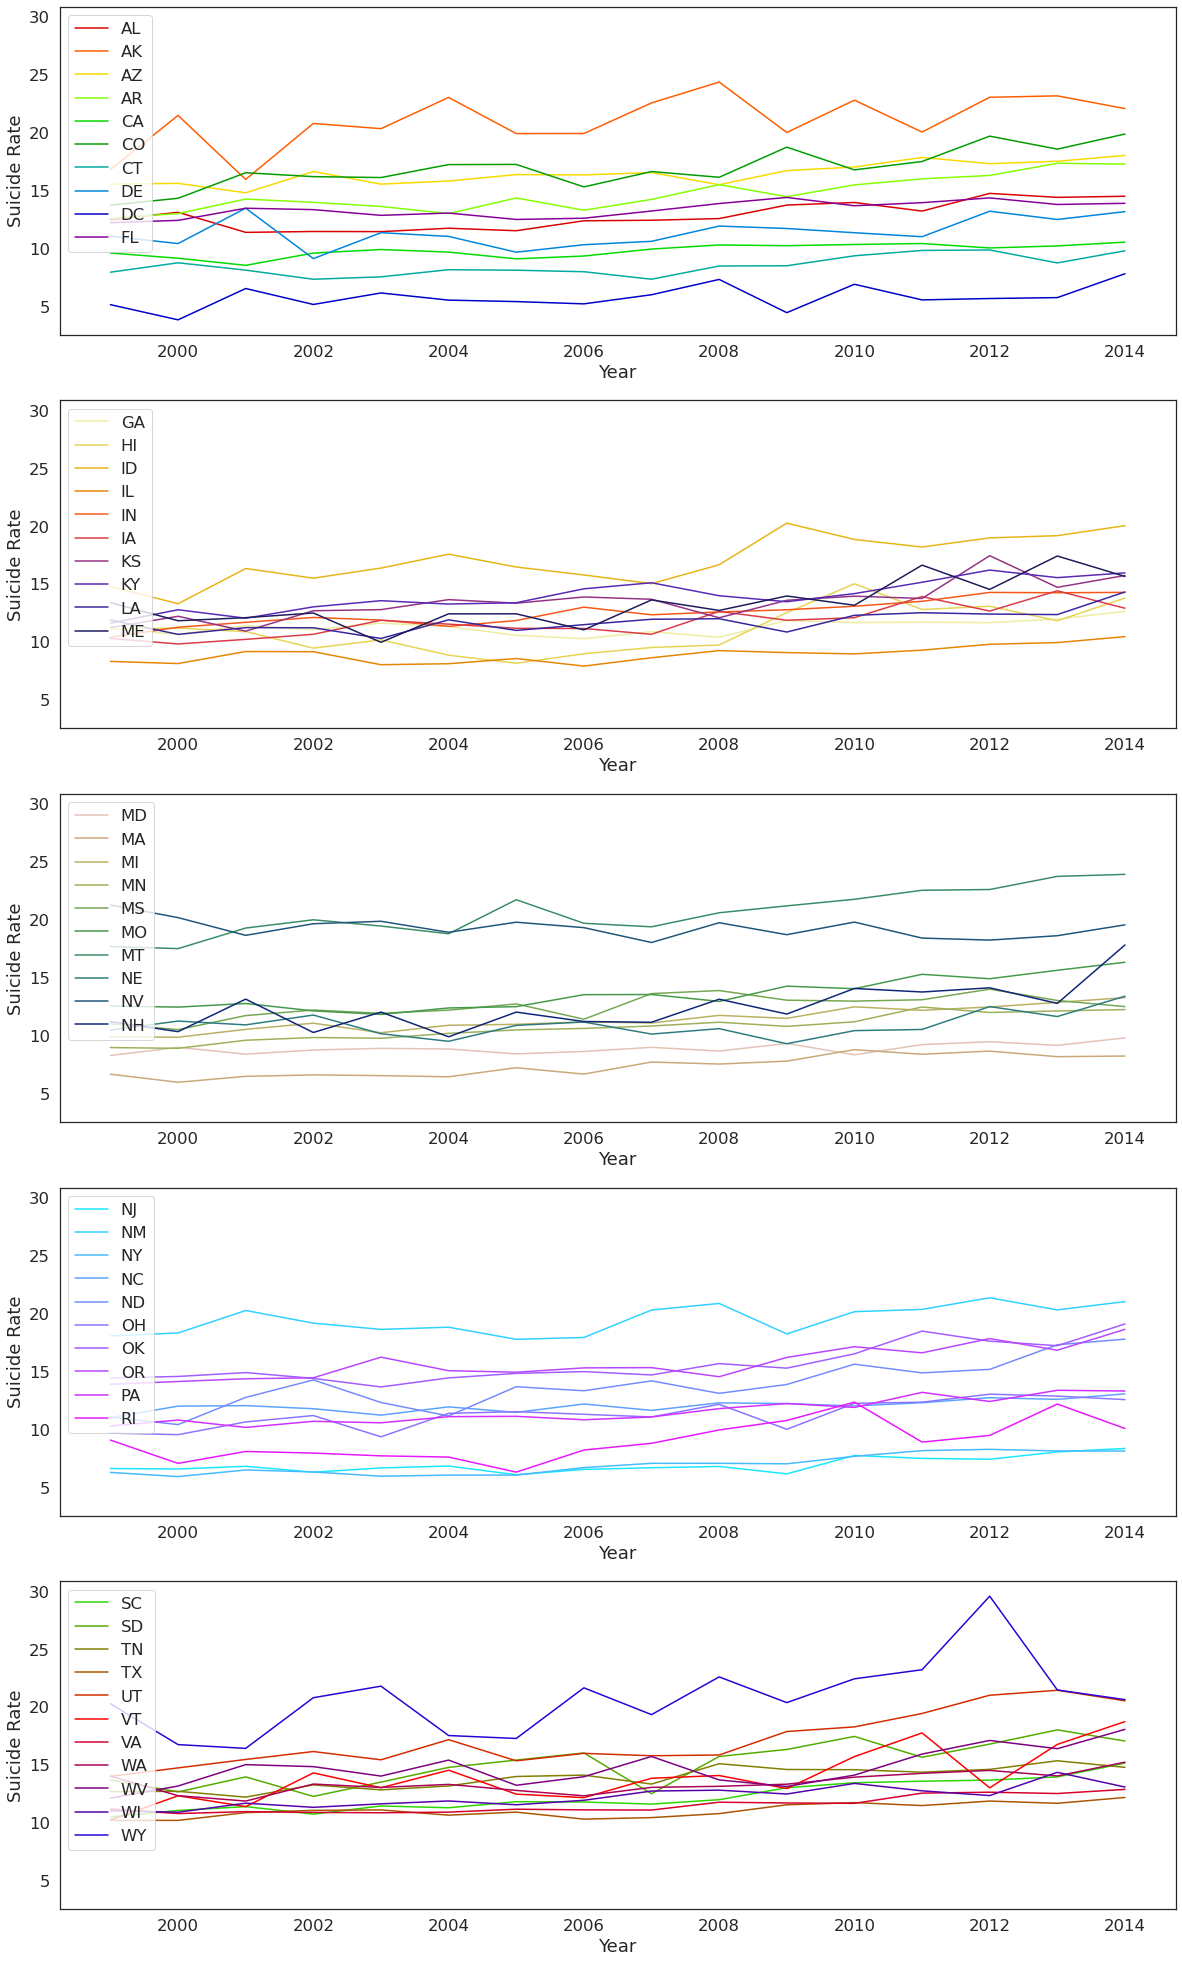

In [33]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
#plotting graphs
sns.lineplot(x = "Year", y = "Suicide Rate", hue = 'State', ax = ax1, data = group_1, palette = 'nipy_spectral_r')
sns.lineplot(x = "Year", y = "Suicide Rate", hue = 'State', ax = ax2, data = group_2, palette = 'CMRmap_r')
sns.lineplot(x = "Year", y = "Suicide Rate", hue = 'State', ax = ax3, data = group_3, palette = 'gist_earth_r')
sns.lineplot(x = "Year", y = "Suicide Rate", hue = 'State', ax = ax4, data = group_4, palette = 'cool')
sns.lineplot(x = "Year", y = "Suicide Rate", hue = 'State', ax = ax5, data = group_5, palette = 'brg_r')
#setting legend location
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')

It looks like suicide rates throughout most states remain relatively constant with a slight increase as the years pass by. However, there are some states like Arkanas, Idaho, Nevada, Montana, and Wyomying that have higher suicide rates than the rest of the states. Out of those states, Arkanas and Wyoming have wide fluctations in their suicide rates throughout the years.

### Expenditure spent on Education from 1999-2014 by State

Text(0, 0.5, 'Percent of Expenditure Spent on Education')

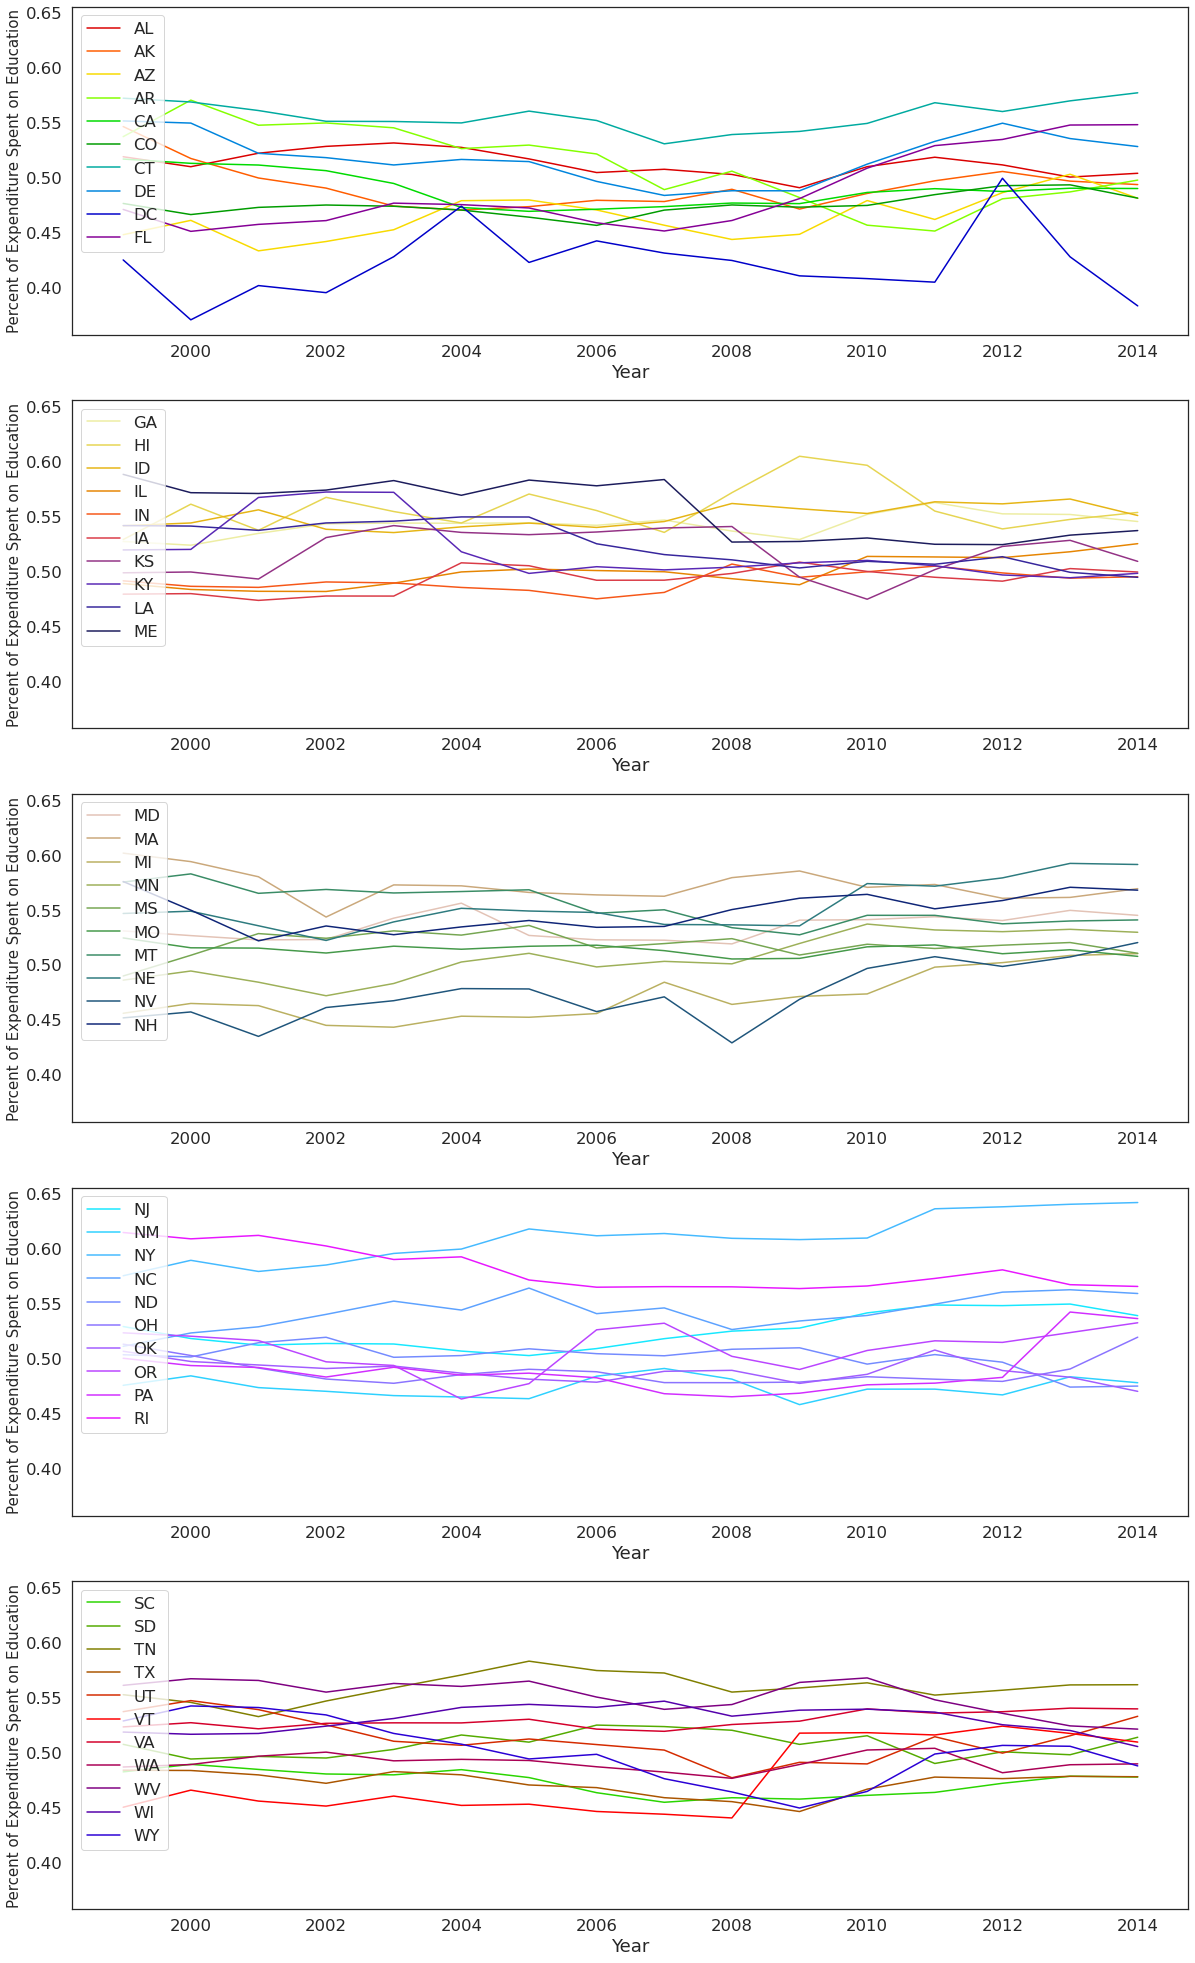

In [34]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
#plotting graphs
sns.lineplot(x = "Year", y = "Percent of Expenditure Spent on Education", hue = 'State', ax = ax1, data = group_1, palette = 'nipy_spectral_r')
sns.lineplot(x = "Year", y = "Percent of Expenditure Spent on Education", hue = 'State', ax = ax2, data = group_2, palette = 'CMRmap_r')
sns.lineplot(x = "Year", y = "Percent of Expenditure Spent on Education", hue = 'State', ax = ax3, data = group_3, palette = 'gist_earth_r')
sns.lineplot(x = "Year", y = "Percent of Expenditure Spent on Education", hue = 'State', ax = ax4, data = group_4, palette = 'cool')
sns.lineplot(x = "Year", y = "Percent of Expenditure Spent on Education", hue = 'State', ax = ax5, data = group_5, palette = 'brg_r')
#setting legend location and changing y-axis font size
ax1.legend(loc='upper left')
ax1.set_ylabel("Percent of Expenditure Spent on Education" , fontsize = 15)
ax2.legend(loc='upper left')
ax2.set_ylabel("Percent of Expenditure Spent on Education" , fontsize = 15)
ax3.legend(loc='upper left')
ax3.set_ylabel("Percent of Expenditure Spent on Education" , fontsize = 15)
ax4.legend(loc='upper left')
ax4.set_ylabel("Percent of Expenditure Spent on Education" , fontsize = 15)
ax5.legend(loc='upper left')
ax5.set_ylabel("Percent of Expenditure Spent on Education" , fontsize = 15)

It looks like education expenditure throughout most states remain relatively constant, but the trend isn't uniform between all states. There are states like New York that have a positive trend, but there are also states like Arkansas that have a negative trend.

### Crime Rate from 19999-2014 by State

Text(0, 0.5, 'Total Crime Rate per State')

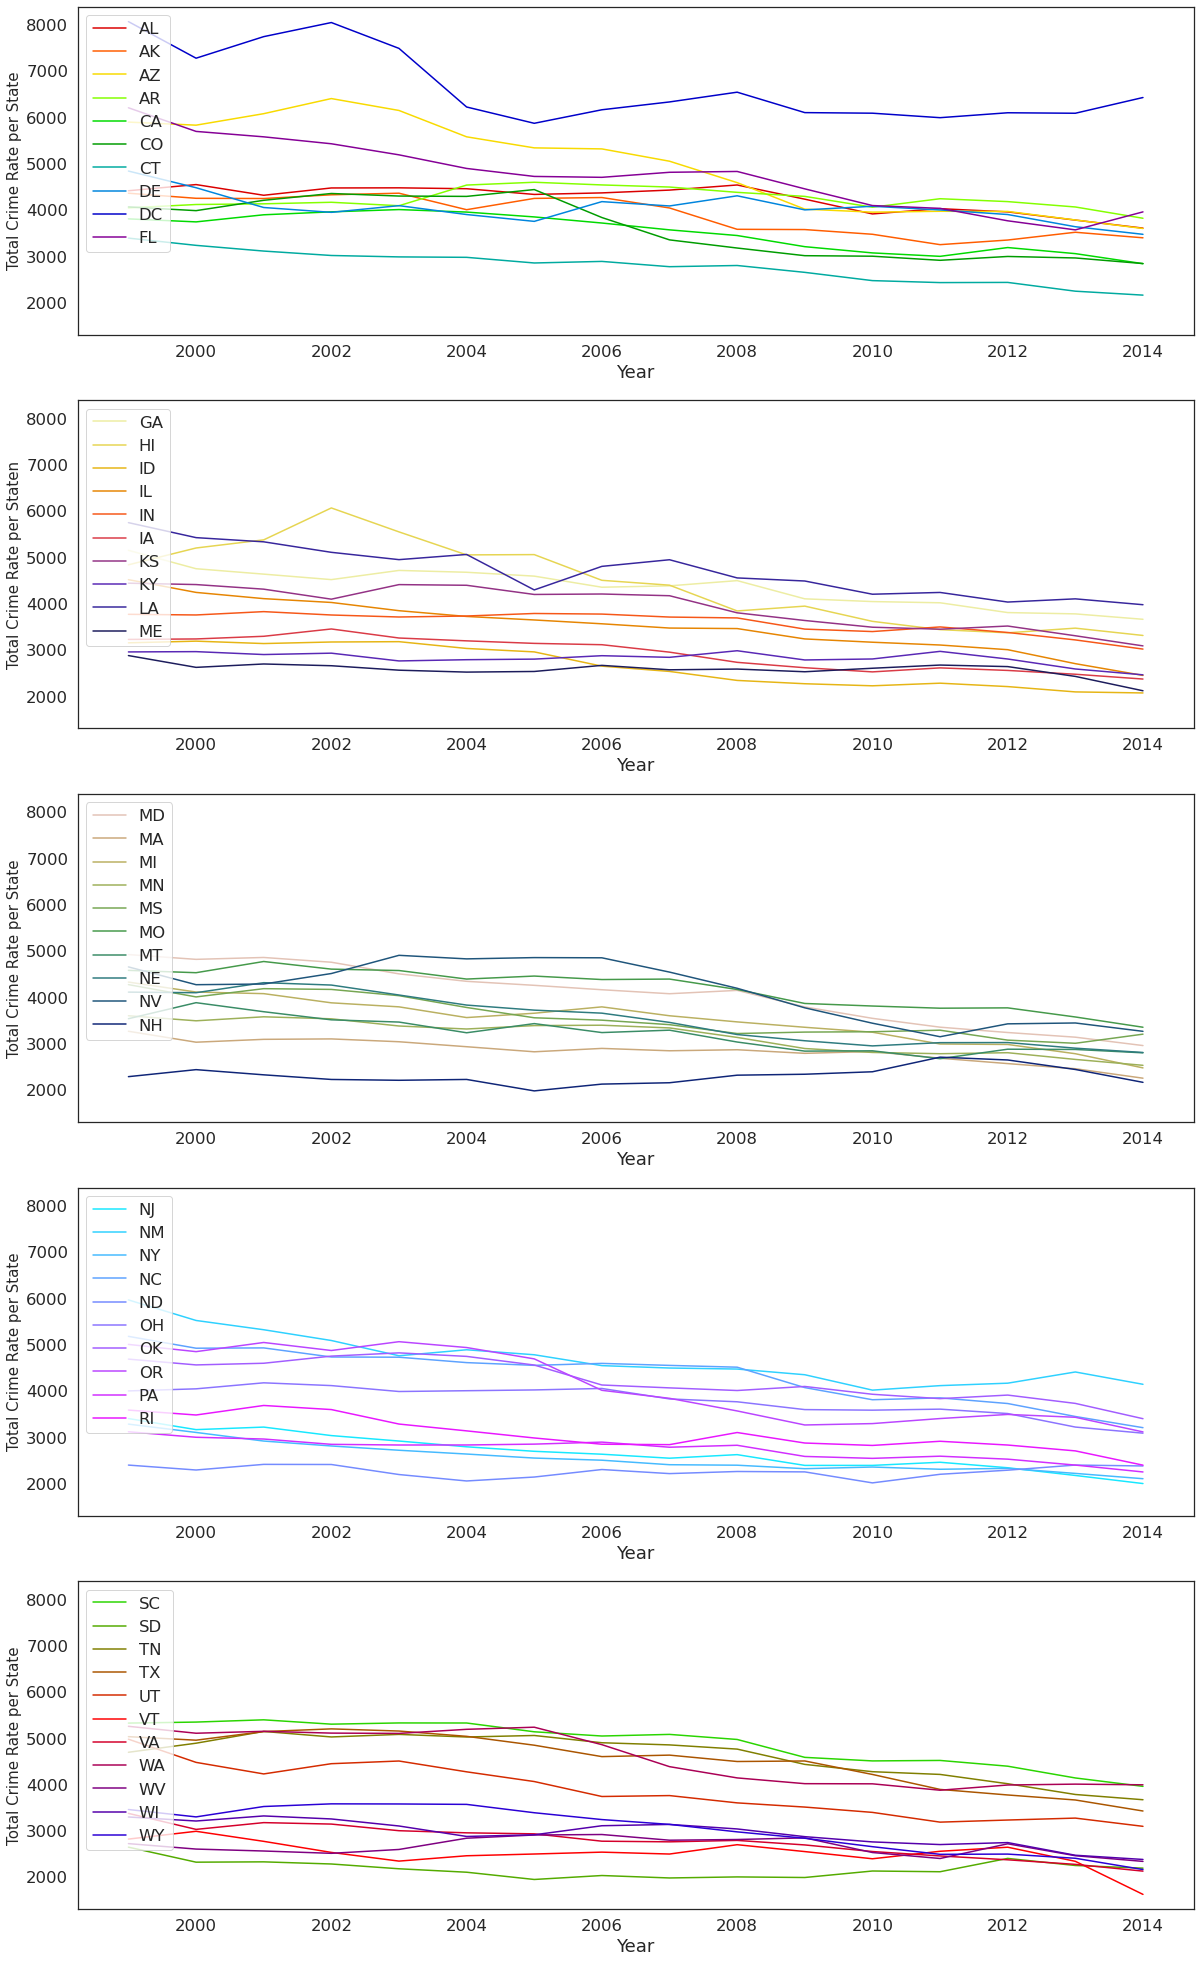

In [35]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
#plotting graphs
sns.lineplot(x = "Year", y = "Total Crime Rate per State", hue = 'State', ax = ax1, data = group_1, palette = 'nipy_spectral_r')
sns.lineplot(x = "Year", y = "Total Crime Rate per State", hue = 'State', ax = ax2, data = group_2, palette = 'CMRmap_r')
sns.lineplot(x = "Year", y = "Total Crime Rate per State", hue = 'State', ax = ax3, data = group_3, palette = 'gist_earth_r')
sns.lineplot(x = "Year", y = "Total Crime Rate per State", hue = 'State', ax = ax4, data = group_4, palette = 'cool')
sns.lineplot(x = "Year", y = "Total Crime Rate per State", hue = 'State', ax = ax5, data = group_5, palette = 'brg_r')
#setting legend location and changing y-axis font size
ax1.legend(loc='upper left')
ax1.set_ylabel("Total Crime Rate per State" , fontsize = 15)
ax2.legend(loc='upper left')
ax2.set_ylabel("Total Crime Rate per Staten" , fontsize = 15)
ax3.legend(loc='upper left')
ax3.set_ylabel("Total Crime Rate per State" , fontsize = 15)
ax4.legend(loc='upper left')
ax4.set_ylabel("Total Crime Rate per State" , fontsize = 15)
ax5.legend(loc='upper left')
ax5.set_ylabel("Total Crime Rate per State" , fontsize = 15)

The crime rate for almost all states decreased from 1999-2014.

### Unemployment Rate from 1999-2014 by State

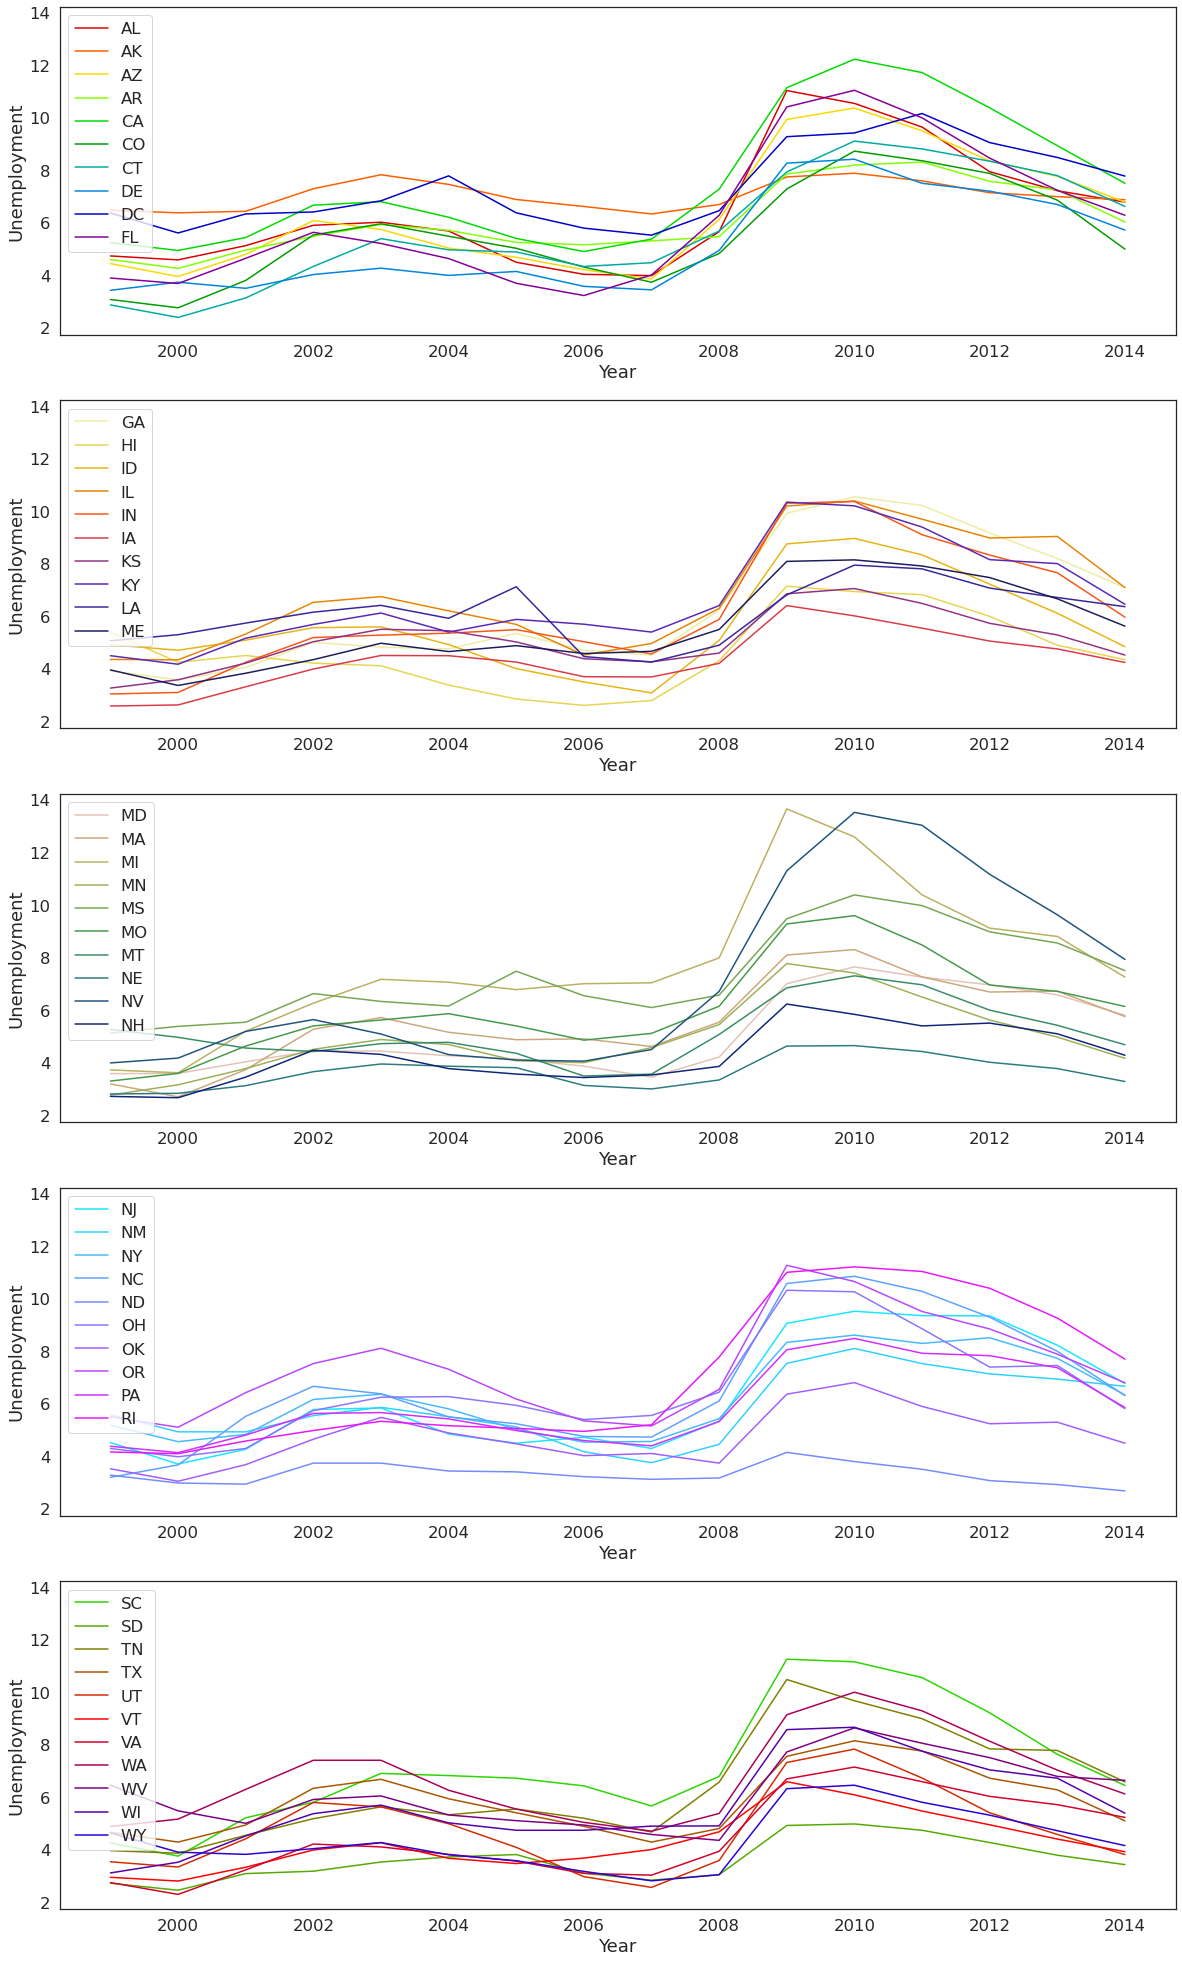

In [36]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
#plotting graphs
sns.lineplot(x = "Year", y = "Unemployment", hue = 'State', ax = ax1, data = group_1, palette = 'nipy_spectral_r')
sns.lineplot(x = "Year", y = "Unemployment", hue = 'State', ax = ax2, data = group_2, palette = 'CMRmap_r')
sns.lineplot(x = "Year", y = "Unemployment", hue = 'State', ax = ax3, data = group_3, palette = 'gist_earth_r')
sns.lineplot(x = "Year", y = "Unemployment", hue = 'State', ax = ax4, data = group_4, palette = 'cool')
sns.lineplot(x = "Year", y = "Unemployment", hue = 'State', ax = ax5, data = group_5, palette = 'brg_r')
#setting legend location
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')

The unemployment rate for all states follows the same trend. From 1999-2007, the unemployment rate remained pretty constant with a slight increase around 2002. However, starting in 2008, the unemployment rate skyrocketed in all states, reaching a peak at around 2010. Afterwards, the unemployment rate steadily decreases, nearly reaching where it was in 2007. This is most likely due to the burst of the housing bubble in 2008 which caused many people to lose their jobs.  

## Plotting Suicide Rate against Education Expenditure, Crime Rate, & Unemployment

In the next section, we use lineplots to see if their is a correlation between suicide rates and the three variables: education expenditure, crime rate, & unemployment rate. To do this, we plot a states suicide rate against one of the three variable. Time doesn't translate in these plots. First, we use the line plot tool in seaborn to plott education expenditure, crime rate, or unemployment rate on the x-axis and suicide rate on the y-axis using the 5 groups. We used line plots to better discern between each state. Looking at the line, we can see the range of each variable. The amount a line stretches along the x-axis shows the range of the education expenditure, crime rate, or unemployment rate in that state. The amount a line fluctuates along the y-axis shows the range of the suicide rate in that state. This allows us to see if the state tends to be located in terms of suicide rates and education expenditure, crime rate, or unemployment rate.

For example, take the suicide rate and education expenditure in Washington D.C. Since their trend line stretches over half the graph, it means that they had a wide range for education expenditure. The bumps in trendline shows the flucates in suicide rate as education expenditure increases. Because the trend line stays constant as their education expenditure increases, you can infer that an increase in education expenditure didn't result in a decrease in the suicide rate. The location of the trend line in the bottom left also shows that Washington D.C. has a lower suicide rate and lower education expenditure compared to the rest of the states in the group.

Then, we use a scatter plot to see if there is an overall trend throughout all the states.

### Suicide Rate against Percent Education Expenditure 

Line plots showing the correlation between suicide rate and the percent of a state's expenditure on education grouped by state using data from 1999-2014: 

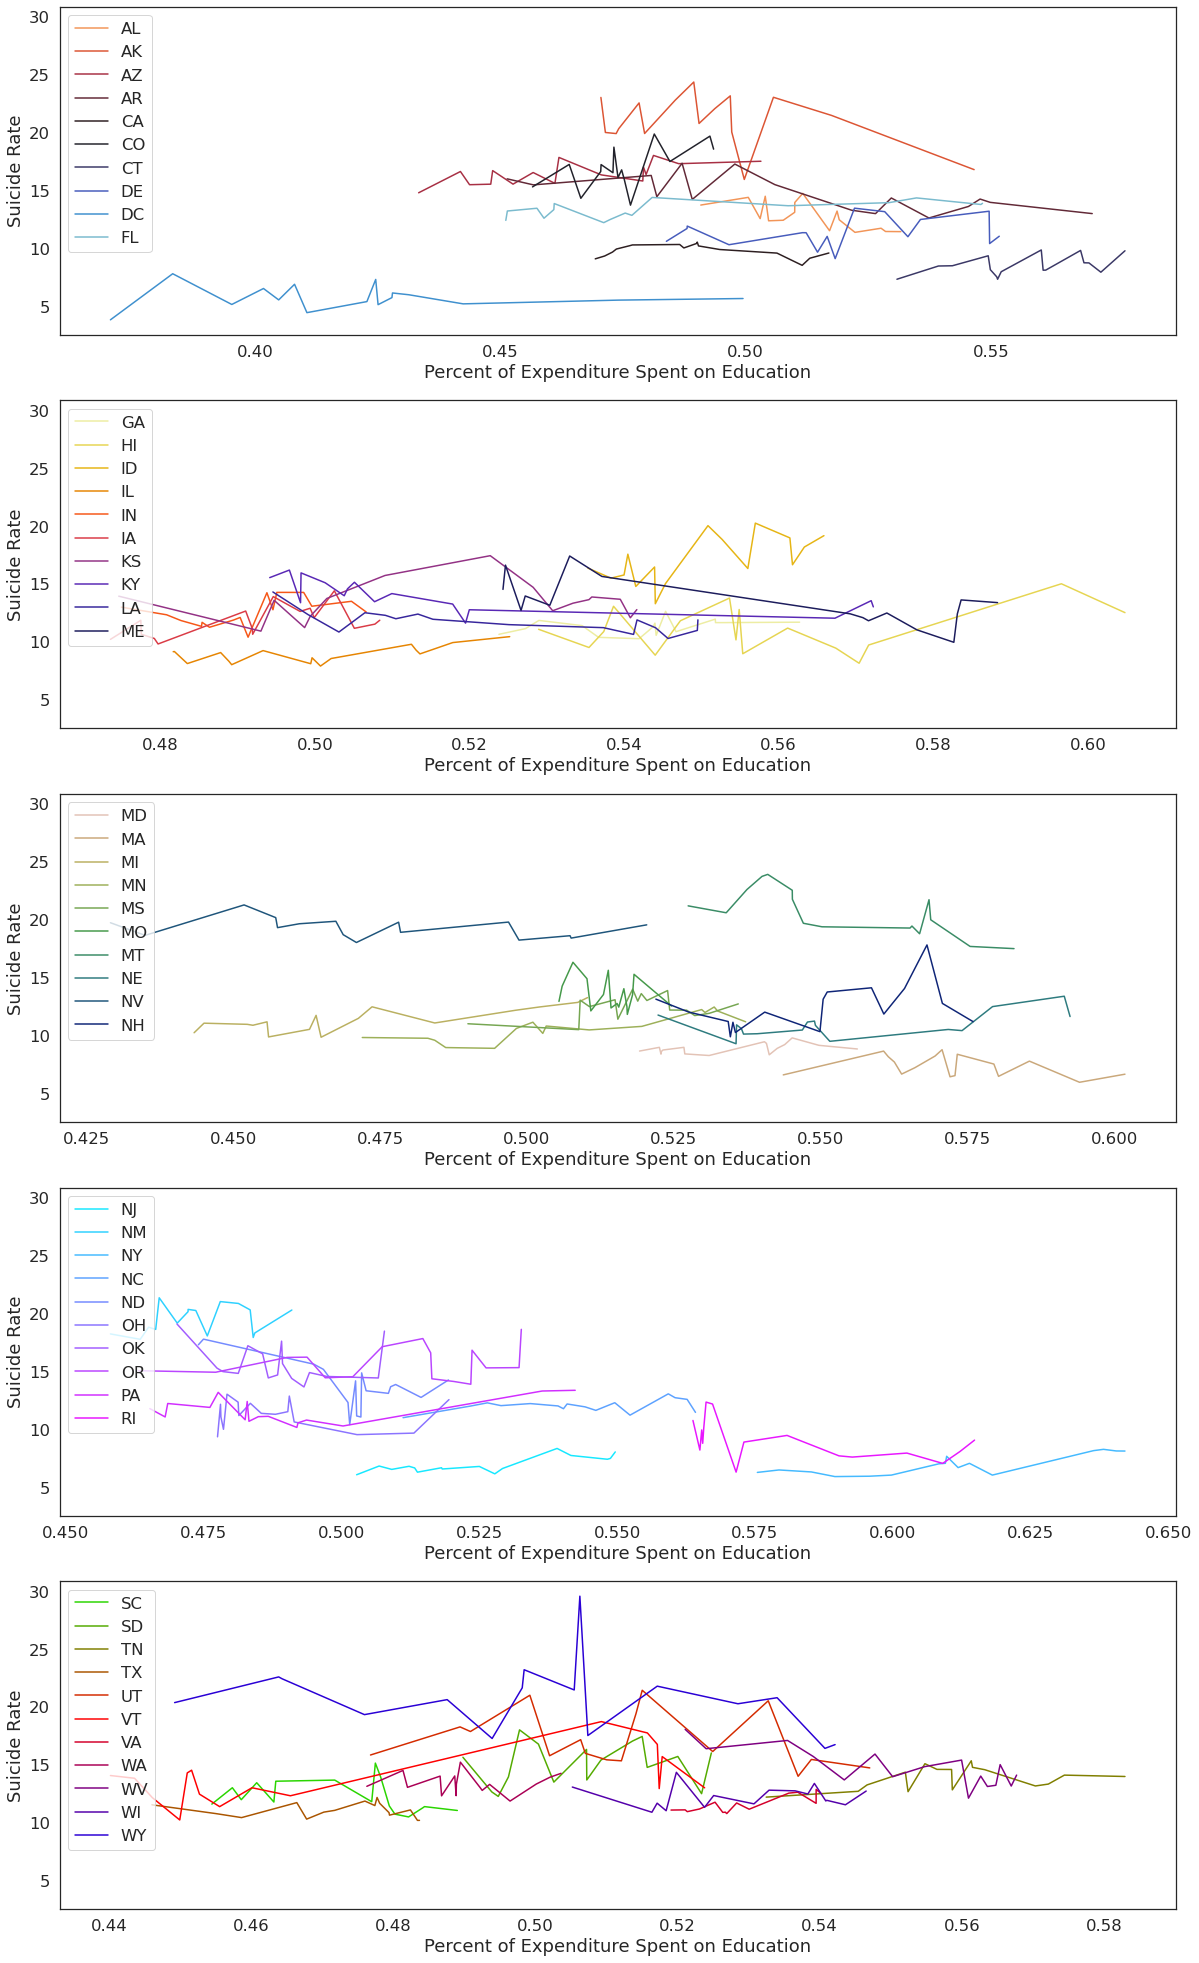

In [37]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
#plotting graphs
group_1_edu_by_suicide = sns.lineplot(data = group_1, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', ax = ax1, hue = 'State', palette = 'icefire_r')
group_2_edu_by_suicide = sns.lineplot(data = group_2, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', ax = ax2, hue = 'State', palette = 'CMRmap_r')
group_3_edu_by_suicide = sns.lineplot(data = group_3, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', ax = ax3, hue = 'State', palette = 'gist_earth_r')
group_4_edu_by_suicide = sns.lineplot(data = group_4, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', ax = ax4, hue = 'State', palette = 'cool')
group_5_edu_by_suicide = sns.lineplot(data = group_5, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', ax = ax5, hue = 'State', palette = 'brg_r')
#setting legend location
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')

Scatter plot to see if there is a trend between suicide rate and education expenditure across all states from 1999-2014:

<AxesSubplot:xlabel='Percent of Expenditure Spent on Education', ylabel='Suicide Rate'>

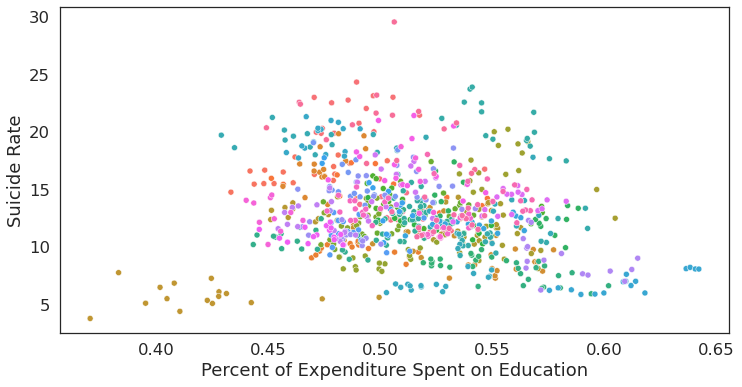

In [38]:
edu_by_suicide = sns.scatterplot(data = tdf, x = 'Percent of Expenditure Spent on Education', y = 'Suicide Rate', hue = 'State')
edu_by_suicide.get_legend().remove()
edu_by_suicide

Despite a few outliers, there is a loose negative correlation between suicide rate and the percent of expenditure spent on education. This means that the more a state spends on education tends to lower the suicide rate.

### Suicide Rate against Crime Rate

Line plots showing the correlation between suicide rate and crime rate grouped by state using data from 1999-2014: 

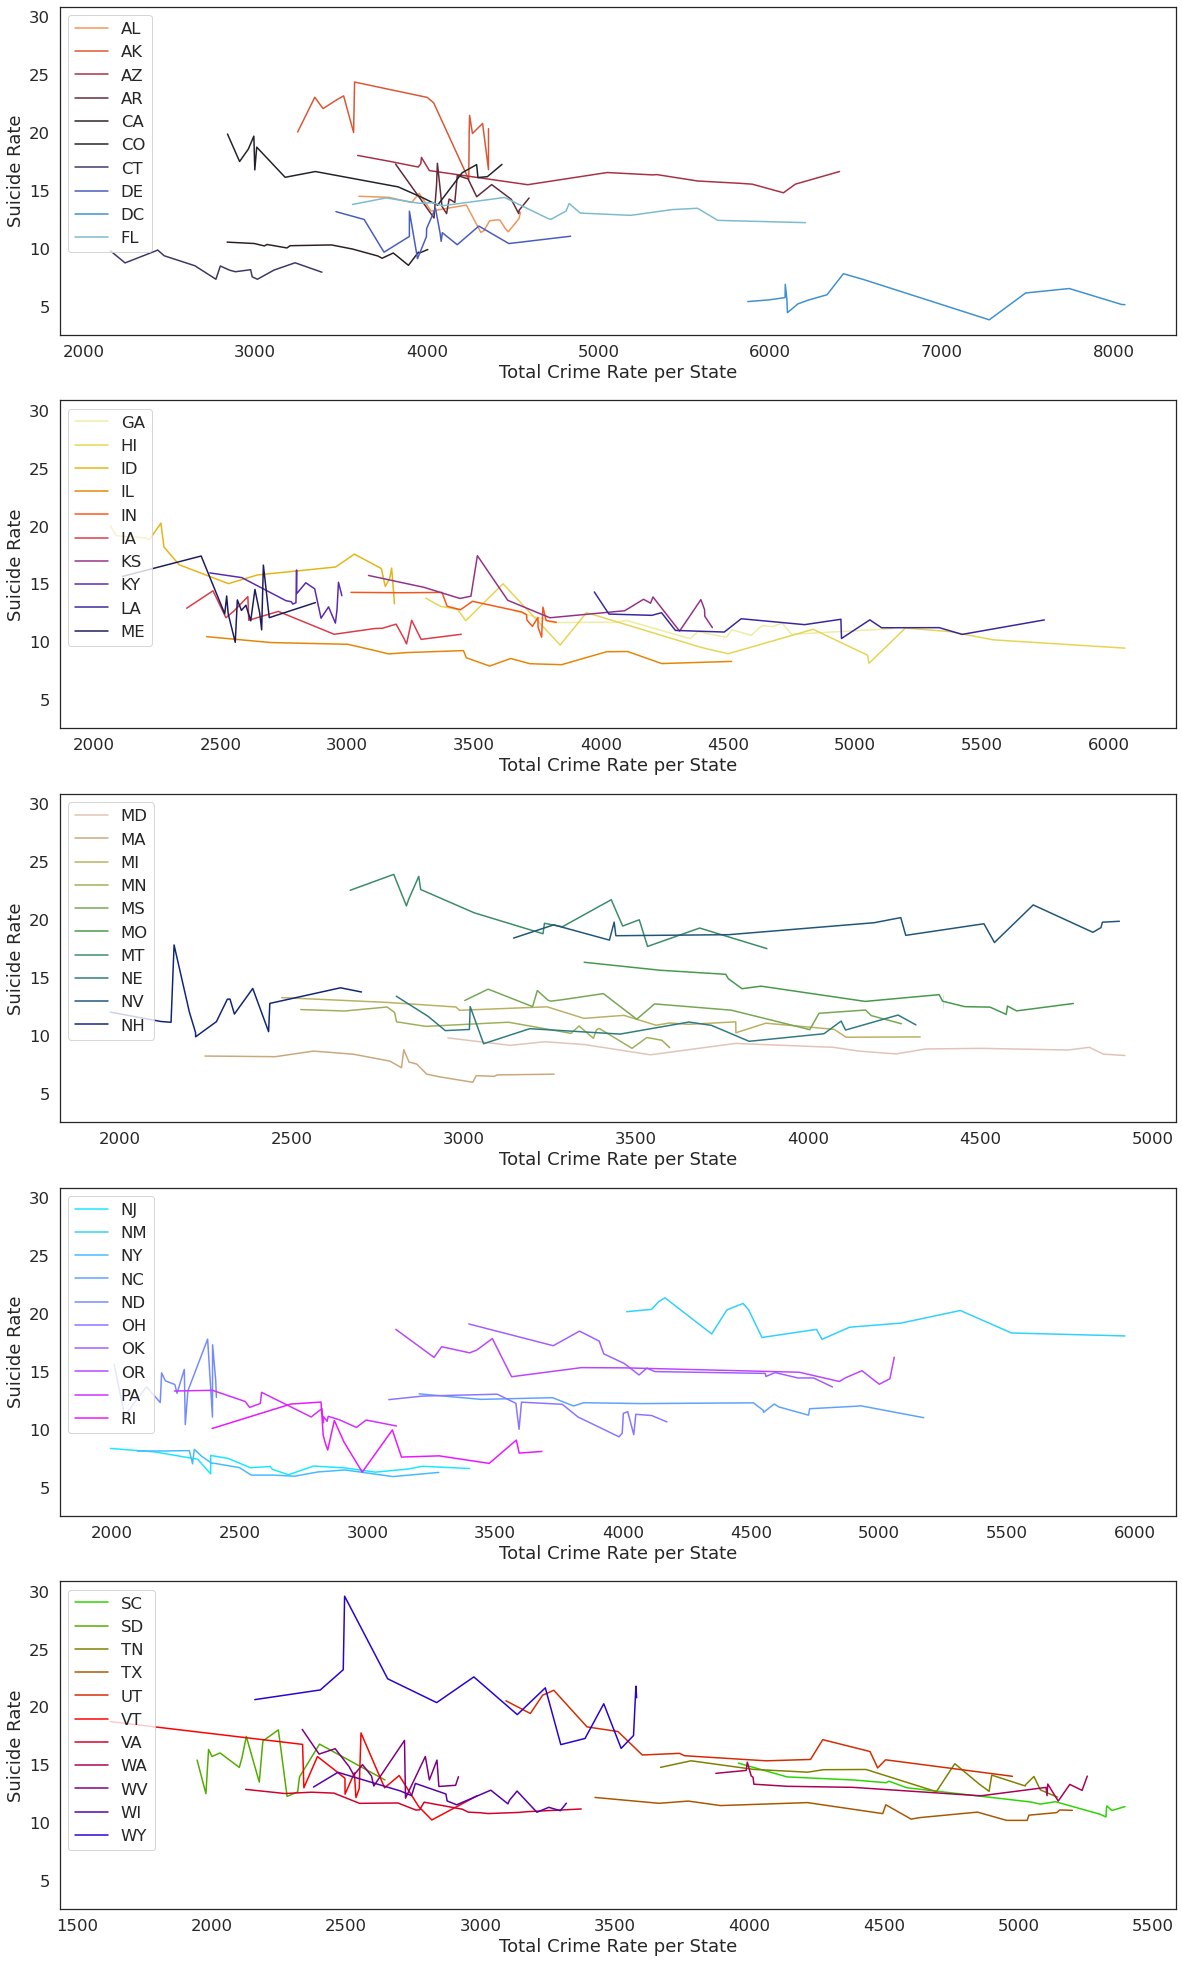

In [39]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
group_1_crime_by_suicide = sns.lineplot(data = group_1, x = 'Total Crime Rate per State', y = 'Suicide Rate', ax = ax1, hue = 'State', palette = 'icefire_r')
group_2_crime_by_suicide = sns.lineplot(data = group_2, x = 'Total Crime Rate per State', y = 'Suicide Rate', ax = ax2, hue = 'State', palette = 'CMRmap_r')
group_3_crime_by_suicide = sns.lineplot(data = group_3, x = 'Total Crime Rate per State', y = 'Suicide Rate', ax = ax3, hue = 'State', palette = 'gist_earth_r')
group_4_crime_by_suicide = sns.lineplot(data = group_4, x = 'Total Crime Rate per State', y = 'Suicide Rate', ax = ax4, hue = 'State', palette = 'cool')
group_5_crime_by_suicide = sns.lineplot(data = group_5, x = 'Total Crime Rate per State', y = 'Suicide Rate', ax = ax5, hue = 'State', palette = 'brg_r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')

Scatter plot to see if there is a trend between suicide rate and crime rate across all states from 1999-2014:

<AxesSubplot:xlabel='Total Crime Rate per State', ylabel='Suicide Rate'>

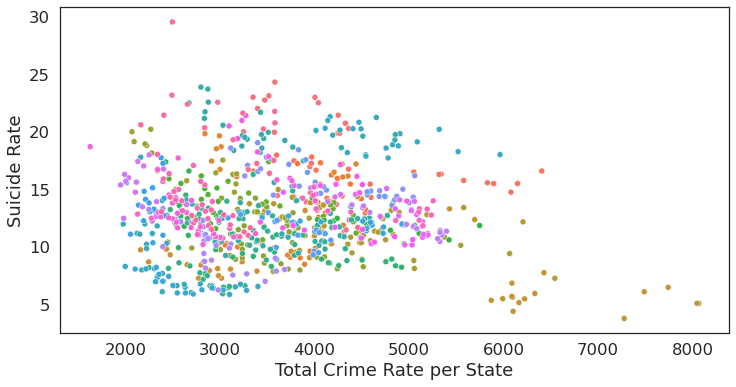

In [40]:
crime_by_suicide = sns.scatterplot(data = tdf, x = 'Total Crime Rate per State', y = 'Suicide Rate', hue = 'State')
crime_by_suicide.get_legend().remove()
crime_by_suicide

There seems to be a loose postive trend between suicide rate and crime rate, minus some outliers. This means that a higher crime rate correlates with a higher suicide rate. 

### Suicide Rate against Unemployment Rate

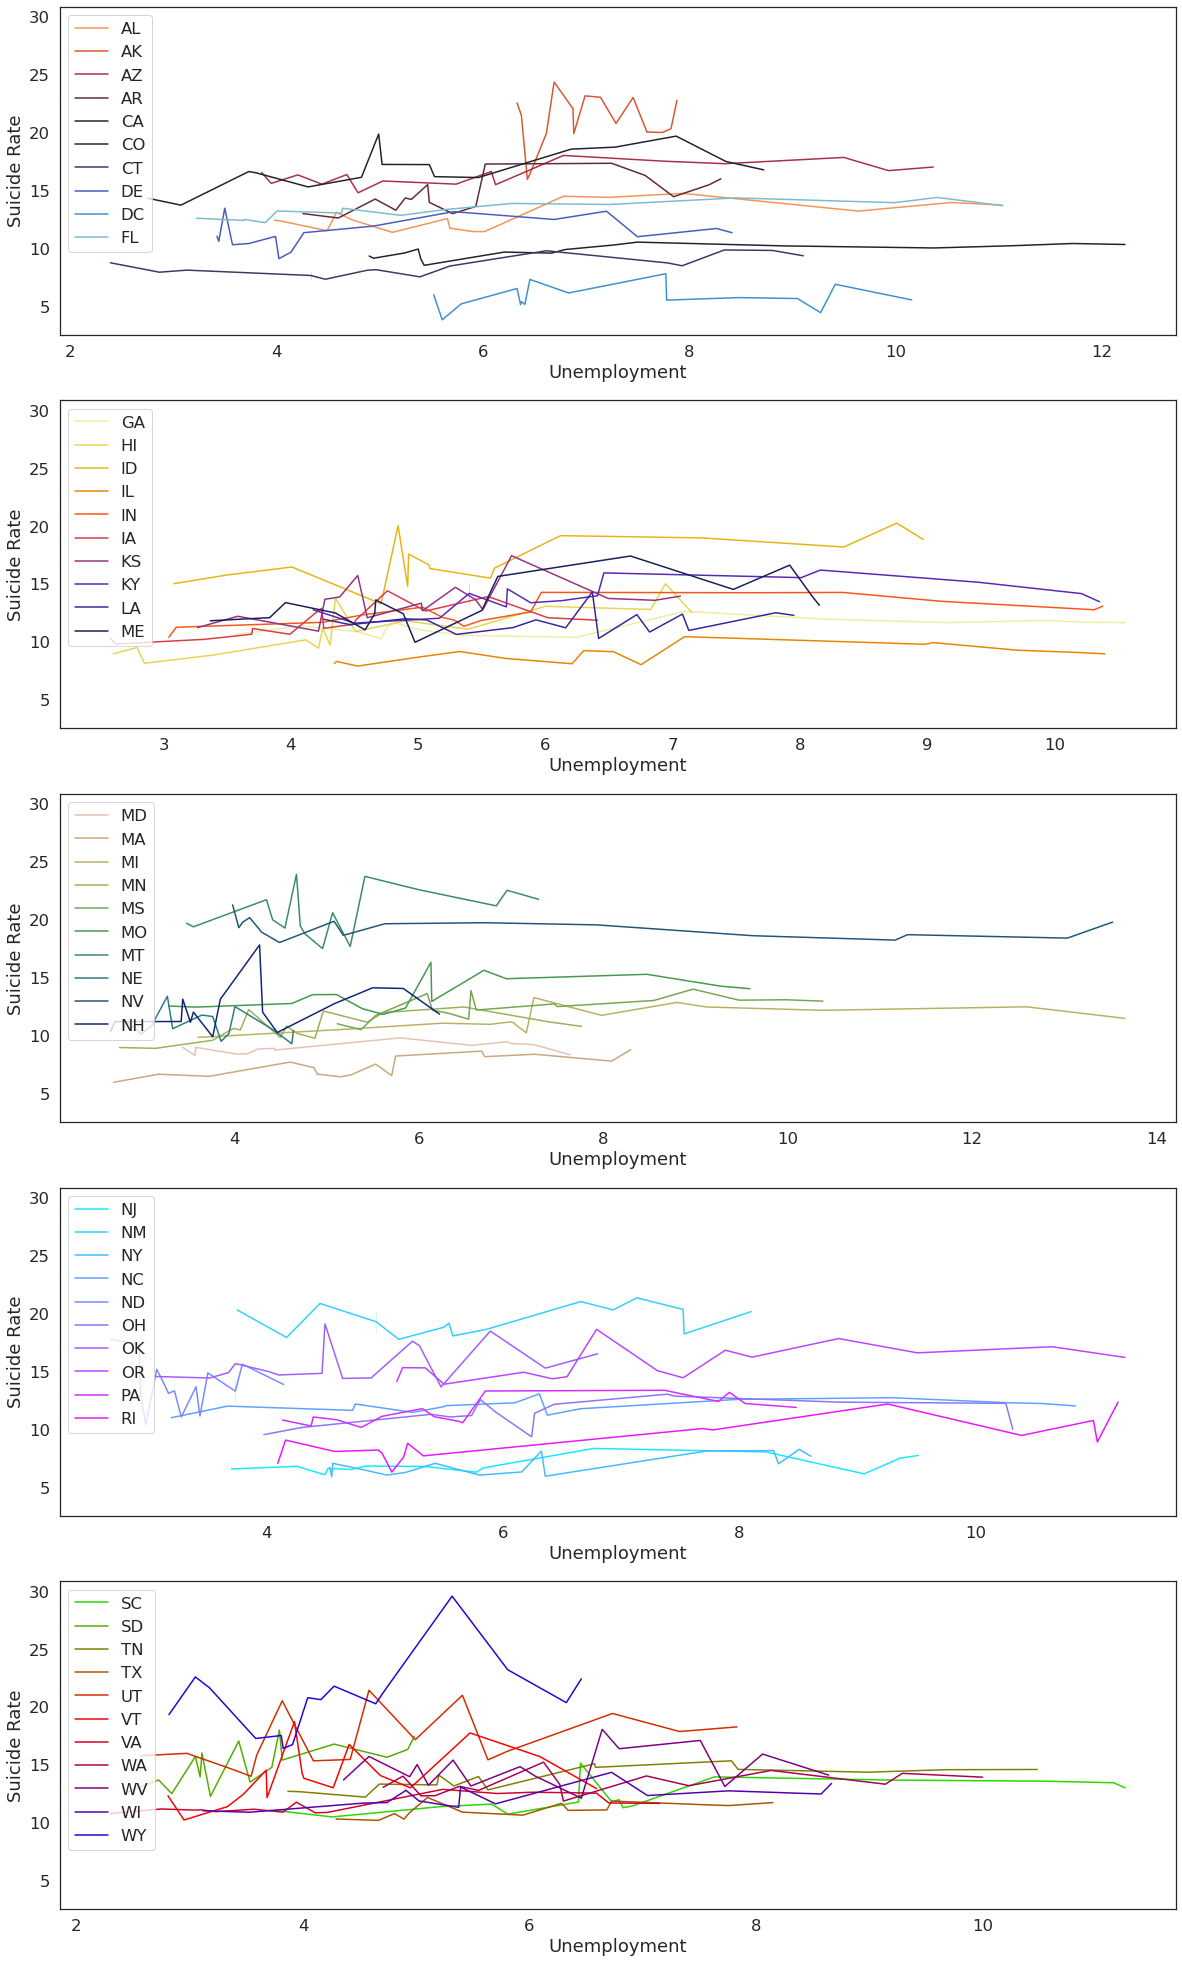

In [41]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(ncols = 1, nrows = 5, sharey = True, figsize=(20,35))
group_1_ue_by_suicide = sns.lineplot(data = group_1, x = 'Unemployment', y = 'Suicide Rate', ax = ax1, hue = 'State', palette = 'icefire_r')
group_2_ue_by_suicide = sns.lineplot(data = group_2, x = 'Unemployment', y = 'Suicide Rate', ax = ax2, hue = 'State', palette = 'CMRmap_r')
group_3_ue_by_suicide = sns.lineplot(data = group_3, x = 'Unemployment', y = 'Suicide Rate', ax = ax3, hue = 'State', palette = 'gist_earth_r')
group_4_ue_by_suicide = sns.lineplot(data = group_4, x = 'Unemployment', y = 'Suicide Rate', ax = ax4, hue = 'State', palette = 'cool')
group_5_ue_by_suicide = sns.lineplot(data = group_5, x = 'Unemployment', y = 'Suicide Rate', ax = ax5, hue = 'State', palette = 'brg_r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')

Scatter plot to see if there is a trend between suicide rate and unemployment rate across all states from 1999-2014: 

<AxesSubplot:xlabel='Unemployment', ylabel='Suicide Rate'>

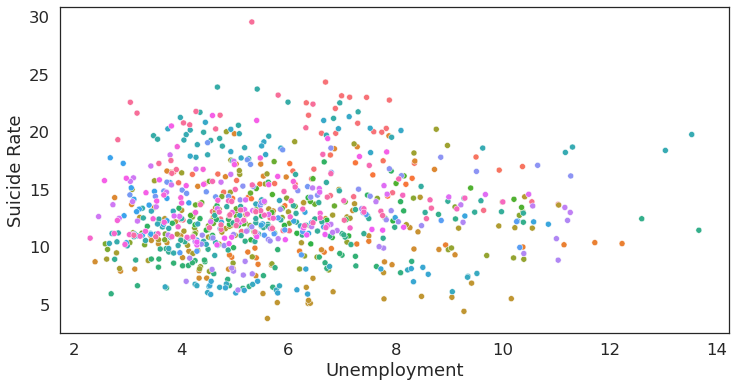

In [42]:
ue_by_suicide = sns.scatterplot(data = tdf, x = 'Unemployment', y = 'Suicide Rate', hue = 'State')
ue_by_suicide.get_legend().remove()
ue_by_suicide

There is a loose postive correlation between suicide rate and unemployment rate, which means that the higher the unemployment rate tends to result in a higher suicide rate.

## Data Analysis

### Preparing Data Frame for Analysis

Before performing the OLS analysis, we created a 'tdf' clone, in order to change the column names into usable labels for patsy. We also logged the suicide rate and unemployment rate. We logged suicide rate to increase the accuracy of the test. We logged the unemployment rate because it changes exponentially around 2008.

In [43]:
tdf_1 = tdf.copy()
tdf_1['suiciderate_log10'] = np.log10(tdf_1['Suicide Rate']+0.1)
#UE is logged because it follows an exponential trend
tdf_1['UE_log10'] = np.log10(tdf_1['Unemployment']+0.1)
tdf_1 = tdf_1.rename(columns={'Percent of Expenditure Spent on Education': 'percent'})
tdf_1 = tdf_1.rename(columns={'Total Crime Rate per State': 'crime'})
tdf_1 = tdf_1.rename(columns={'Suicide Rate': 'suicide'})

## Single Variable Analysis

### Analysis of Suicide Rate vs. Education Expenditure

In [44]:
outcome_2,predictors_2 = patsy.dmatrices('suiciderate_log10 ~ percent', tdf_1)
mod2_log = sm.OLS(outcome_2, predictors_2)
res2_log = mod2_log.fit()
print(res2_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           4.36e-07
Time:                        23:17:02   Log-Likelihood:                 524.56
No. Observations:                 816   AIC:                            -1045.
Df Residuals:                     814   BIC:                            -1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3942      0.058     23.917      0.0

Given that our p-value is 0.000 < alpha value 0.050, we can see that our value is statistically significant, and there is a strong correlation between the Percent of Expenditure Spent on Education and Suicide rates in the United states.

### Analysis of Suicide Rate vs. Crime Rate

In [45]:
outcome_3,predictors_3 = patsy.dmatrices('suiciderate_log10 ~ crime', tdf_1)
mod3_log = sm.OLS(outcome_3, predictors_3)
res3_log = mod3_log.fit()
print(res3_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.649
Date:                Sun, 13 Mar 2022   Prob (F-statistic):             0.0101
Time:                        23:17:03   Log-Likelihood:                 515.08
No. Observations:                 816   AIC:                            -1026.
Df Residuals:                     814   BIC:                            -1017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1403      0.017     67.239      0.0

Our crime rate p-value was 0.010 which is statistically significant because it is less than our alpha value 0.050. This demonstrates that there is a strong correlation between crime rates and suicide rates in the United States.

### Analysis of Suicide Rate vs. Unemployment Rate

In [46]:
outcome,predictors = patsy.dmatrices('suiciderate_log10 ~ UE_log10', tdf_1)
mod_log = sm.OLS(outcome, predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.940
Date:                Sun, 13 Mar 2022   Prob (F-statistic):             0.0868
Time:                        23:17:03   Log-Likelihood:                 513.23
No. Observations:                 816   AIC:                            -1022.
Df Residuals:                     814   BIC:                            -1013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0584      0.024     44.804      0.0

Our p-value for unemployment rate was 0.125, this is not statistically significant because it is greater than 0.050. Since it is not statistically significant, this means that there is no correlation between the unemployment rates and suicide rates in the United States.

## Multivariable Analysis

### Analysis of Suicide Rate vs. Education Expenditure and Crime Rate

In [47]:
outcome_2,predictors_2 = patsy.dmatrices('suiciderate_log10 ~ percent + crime', tdf_1)
mod2_log = sm.OLS(outcome_2, predictors_2)
res2_log = mod2_log.fit()
print(res2_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     27.21
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.66e-12
Time:                        23:17:03   Log-Likelihood:                 538.19
No. Observations:                 816   AIC:                            -1070.
Df Residuals:                     813   BIC:                            -1056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6221      0.072     22.558      0.0

The crime rate p-value of 0.000 was the same for percent on expenditure and this shows a strong correlation with suicide rates as the p-value is statistically significant.

### Analysis of Suicide rate vs. Crime Rate and Unemployment Rate

In [48]:
tdf_1 = tdf_1.rename(columns={'Percent of Expenditure Spent on Education': 'percent'})
tdf_1 = tdf_1.rename(columns={'Total Crime Rate per State': 'crime'})
outcome_2,predictors_2 = patsy.dmatrices('suiciderate_log10 ~ crime + UE_log10', tdf_1)
mod2_log = sm.OLS(outcome_2, predictors_2)
res2_log = mod2_log.fit()
print(res2_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.950
Date:                Sun, 13 Mar 2022   Prob (F-statistic):            0.00730
Time:                        23:17:03   Log-Likelihood:                 516.70
No. Observations:                 816   AIC:                            -1027.
Df Residuals:                     813   BIC:                            -1013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0996      0.028     38.904      0.0

When we compared crime rate and unemployment rate with suicide rates, we found that only crime rate is statistically significant with a p-value of 0.000. The unemployment rate was not statistically significant as it had a value of 0.073.

### Analysis of Suicide Rate vs. Education Expenditure and Unemployment Rate

In [49]:
tdf_1 = tdf_1.rename(columns={'Percent of Expenditure Spent on Education': 'percent'})
tdf_1 = tdf_1.rename(columns={'Total Crime Rate per State': 'crime'})
outcome_2,predictors_2 = patsy.dmatrices('suiciderate_log10 ~ percent + UE_log10', tdf_1)
mod2_log = sm.OLS(outcome_2, predictors_2)
res2_log = mod2_log.fit()
print(res2_log.summary())

                            OLS Regression Results                            
Dep. Variable:      suiciderate_log10   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     14.04
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.02e-06
Time:                        23:17:03   Log-Likelihood:                 525.61
No. Observations:                 816   AIC:                            -1045.
Df Residuals:                     813   BIC:                            -1031.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3562      0.064     21.222      0.0

When we compared percent on expenditure rates and unemployment rates along with the suicide rates, the percent on expenditure remained statistically significant with a p-value of 0.000. The unemployment rates were not statistically significant because the p-value was 0.149.

# Ethics & Privacy

Our data does not have any bias issues because we used anonymous data. The data we collected was about unemployment rates, crime rates, suicide rates, and the percent of expenditure of the United States. The data included all states of the U.S. so no bias was reflected. The data set on state suicide deaths is easily accessible and the source we used got the data from the Centers for Disease Control and Prevention which is a trustable source. The data collected in the datasets were anonymized because only the state, and number values are visible so no one’s privacy was violated. In addition, no consent was used because we did not use human subjects in our project. In order to avoid any ethical and biased concerns we analyzed a wide range of years. 

The data collected in the datasets include data from 1976 and data after 2014 but we only used data from 1999-2014. After analyzing the data we realized that the results of which variable is more statistically significant with suicide rates may not be applicable to present day because we only anlayzed data from 1999-2014. If we analyzed data from 1999-present, some bias may arise such as major societal events that led to one variable being more statistically significant than another variable. 


# Conclusion & Discussion

In this project we wanted to assess if there is a correlation between suicide rates and the welfare variable of each state. We collected multiple datasets of suicide rates, crime rates, unemployment rates and educational expenditure of each state in the US from 1999 to 2014. After cleaning our data, to perform our research, we decided to combine all the datasets into a giant dataset and named it tdf. For our analysis we alphabetically divided all fifty states into five groups of ten. This way we could get better charts and visualization.
    
Looking at the line plots of Percent of Expenditure Spent on Education against year, education expenditure throughout most states remained relatively constant, but the trend isn't uniform between all states. However, some states like New York have a positive slope and some states like Arkansas have a negative slope. We noticed that the crime rate for all the states was negative during 1999-2014. The line plots of the unemployment rate shows that unemployment remained constant. The unemployment rate increased in all states in 2008 and it got to its highest rate around 2010. The unemployment rate has decreased afterwards.


Through using the OLS anaylsis, we were able to find correlation between the variables. The analysis reported that the p-values for Percent of Expenditure Spent vs. suide rates is 0.000 which is less than our alpha value 0.050 and sufficient enough to reject the null analysis; p-values for crime rate vs. suide rates is 0.010 (less than alpha value 0.050); lastly, the p-values for Unemployment rate vs. suide rates is 0.125 which is greater than alpha value 0.050. We can conclude that there is a statistical signifiant relationship between suicide rates in major U.S. states and crime rates and Percent of Expenditure Spent in the U.S., however, the correlation between suicide rates in major U.S. states and the unemployment rates is not statistical significant. Nevertheless, it’s important to note that there are limitations in our research, as there are other variables we didn’t consider into our analysis such as previous suicide attempt and mental disorders, etc. These variables could also very much affect the suide rates in major states of the U.S., but for our project we have decided to focus on the relationship between suide rates and crime rate, unemployment rate and educational expenditure for the sake of statistical simplicity and clarity. 

# Team Contributions

- Aretha worked on coding for Setup, Data Cleaning, Visualization, and Analysis, explanation for Data Visualizations and Analysis, editing video
- Jing worked on Overview, Background and Prior work, Conclusion, edittng Hypothesis, Final Checks
- Ramtin worked on collecting datasets, Data Cleaning and processing, Conclusion
- Sarai worked on Ethics & Privacy, OLS Regression explanations, Background articles, consolidation of information for final project
- Scott worked on searching for datasets, Data cleaning Explanations, Data Visualization and Analysis, Results, Hypothesis 
